Tree operations
===============

The objective of this notebook is to learn how to perform tree operations, such as subsetting and attachment.

## Importing modules and basic settings

In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import scFates as scf

sc.set_figure_params()

In [2]:
adata = sc.read("data/empty_tree.h5ad",backup_url="https://github.com/LouisFaure/scFates_notebooks/raw/main/data/empty_tree.h5ad")

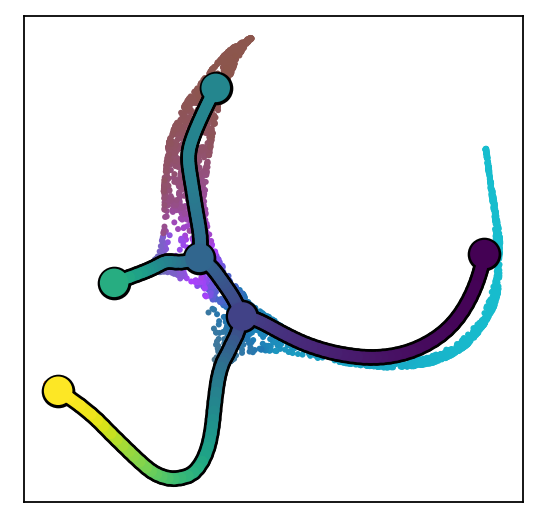

In [3]:
scf.pl.trajectory(adata,basis="draw_graph_fa",color_cells="milestones")

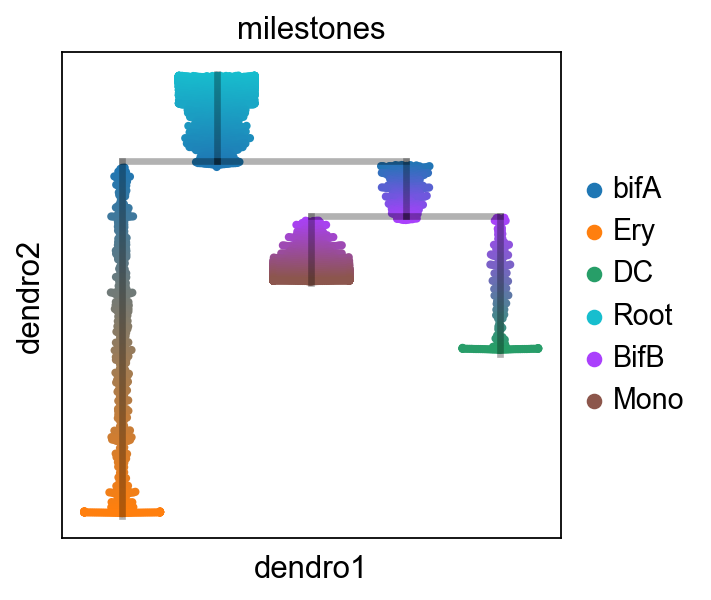

In [4]:
scf.pl.dendrogram(adata,color_milestones=True,color="milestones")

## Subsetting of tree (extraction mode)

### Subtree

In [5]:
adata_extracted=scf.tl.subset_tree(adata,root_milestone="bifA",milestones=["Mono","DC"],copy=True)

subsetting tree
node 33 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


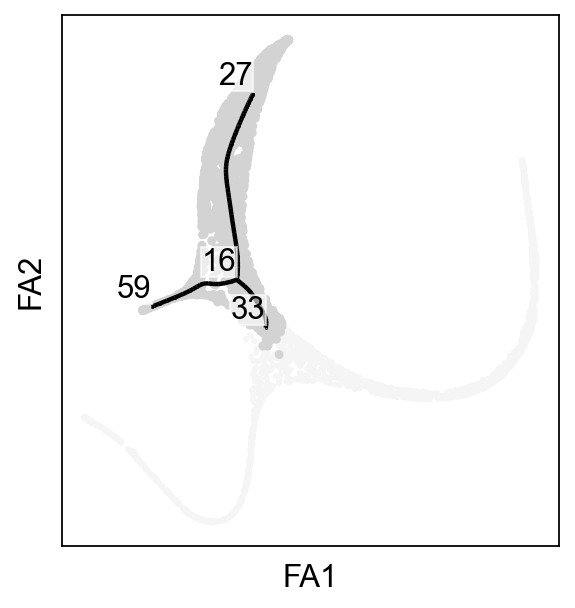

In [6]:
ax=sc.pl.scatter(adata,basis="draw_graph_fa",color="whitesmoke",show=False)
scf.pl.graph(adata_extracted,basis="draw_graph_fa",size_nodes=.1,ax=ax)

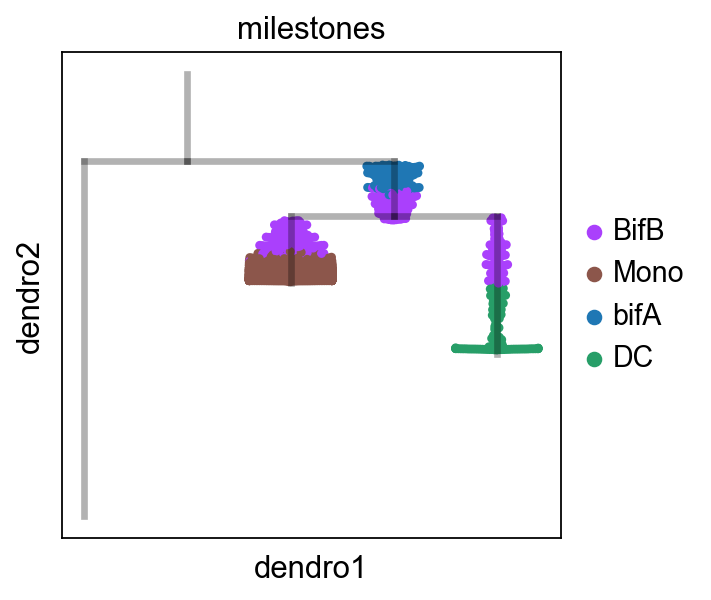

In [7]:
scf.pl.dendrogram(adata_extracted,color="milestones")

### Single branch

In [8]:
adata_extracted=scf.tl.subset_tree(adata,root_milestone="bifA",milestones=["Ery"],copy=True)

subsetting tree
node 42 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


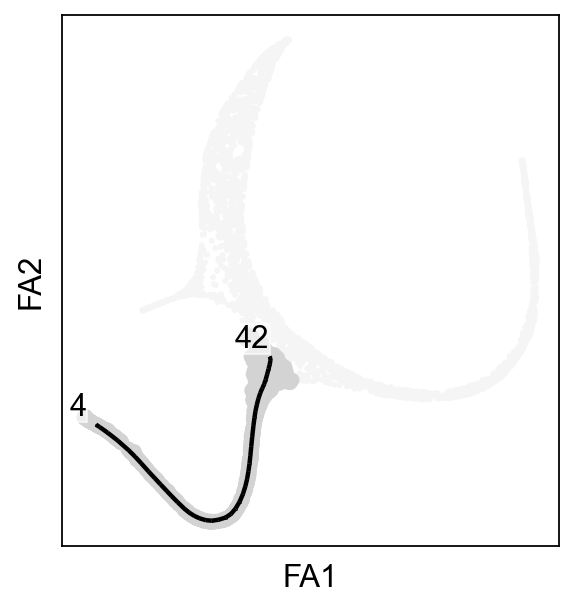

In [9]:
ax=sc.pl.scatter(adata,basis="draw_graph_fa",color="whitesmoke",show=False)
scf.pl.graph(adata_extracted,basis="draw_graph_fa",size_nodes=.1,ax=ax)

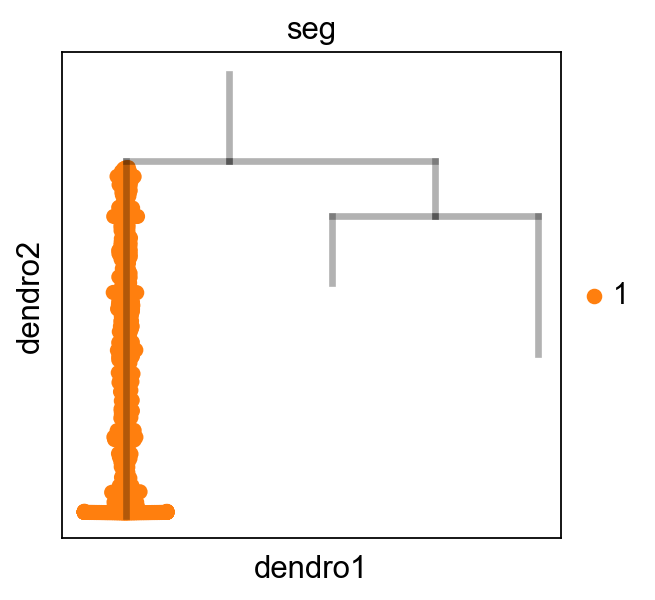

In [10]:
scf.pl.dendrogram(adata_extracted,color="seg")

## Subsetting of tree (substract mode)

In [11]:
adata_subtracted=scf.tl.subset_tree(adata,root_milestone="bifA",milestones=["Ery"],
                                    mode="substract",copy=True)

subsetting tree
node 124 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:03) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree subsetted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


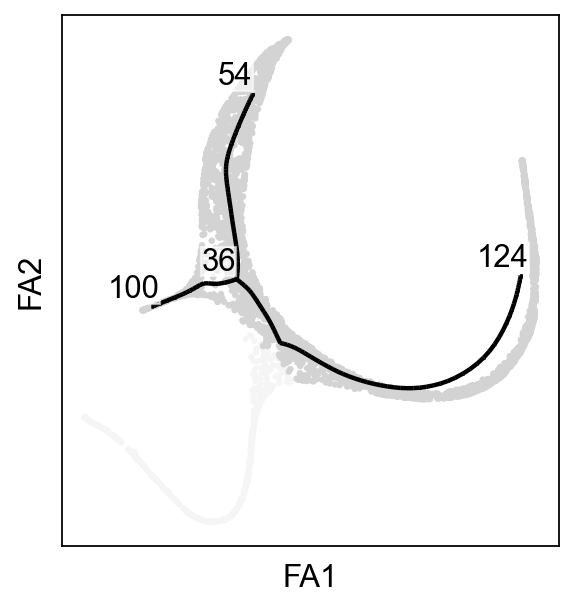

In [12]:
ax=sc.pl.scatter(adata,basis="draw_graph_fa",color="whitesmoke",show=False)
scf.pl.graph(adata_subtracted,basis="draw_graph_fa",size_nodes=.1,ax=ax)

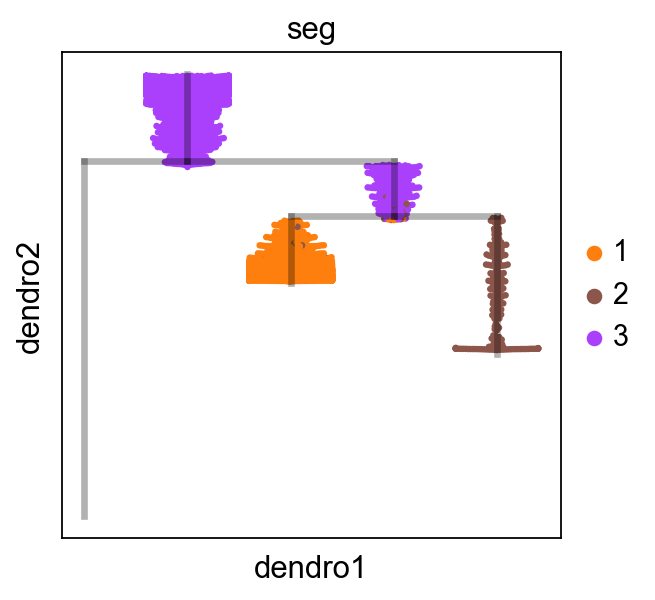

In [13]:
scf.pl.dendrogram(adata_subtracted,color="seg")

## Tree attachment

In [14]:
adata_attached = scf.tl.attach_tree(adata_subtracted,adata_extracted)

attaching tree
    merging
    tree refitting
    finished (0:00:02) --> datasets combined


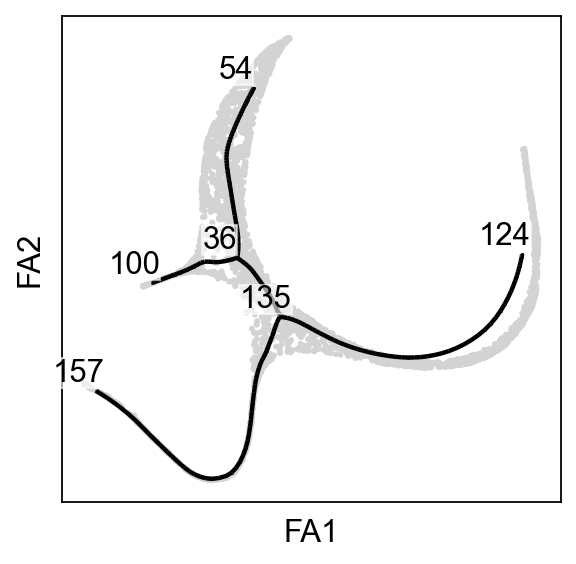

In [15]:
scf.pl.graph(adata_attached,basis="draw_graph_fa",size_nodes=.1)